In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plots
mpl.rcParams['figure.dpi'] = 300
results_dir = './../../results'

In [52]:
region = 'saopaulo'
#neth 20200519_043353
#sao round 1 = 20200518_232330, round 2 = 20200520_031639
datetime = '20200520_031639'

In [53]:
p = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+datetime)
p_base = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+'baseline')
p_base_24 = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+'baseline-24')
dms = pd.read_csv(p).set_index(['distance'])
dms_base = pd.read_csv(p_base).set_index(['distance'])
dms_base_24 = pd.read_csv(p_base_24).set_index(['distance'])

In [54]:
dms = dms.join(dms_base['model_sum'], rsuffix='_baseline')
dms = dms.join(dms_base_24['model_sum'], rsuffix='_baseline_24')
dms = dms[['groundtruth_sum', 'model_sum', 'model_sum_baseline', 'model_sum_baseline_24']]

In [55]:
dms.index = pd.IntervalIndex.from_tuples([tuple(list(map(float, idx.replace('(', '').replace(']', '').split(",")))) for idx in dms.index])

In [56]:
sqrerr = np.square(np.subtract(dms['groundtruth_sum'], dms['model_sum_baseline_24']))
"MSE: {:.5e}".format(sqrerr.mean())

'MSE: 4.76699e-04'

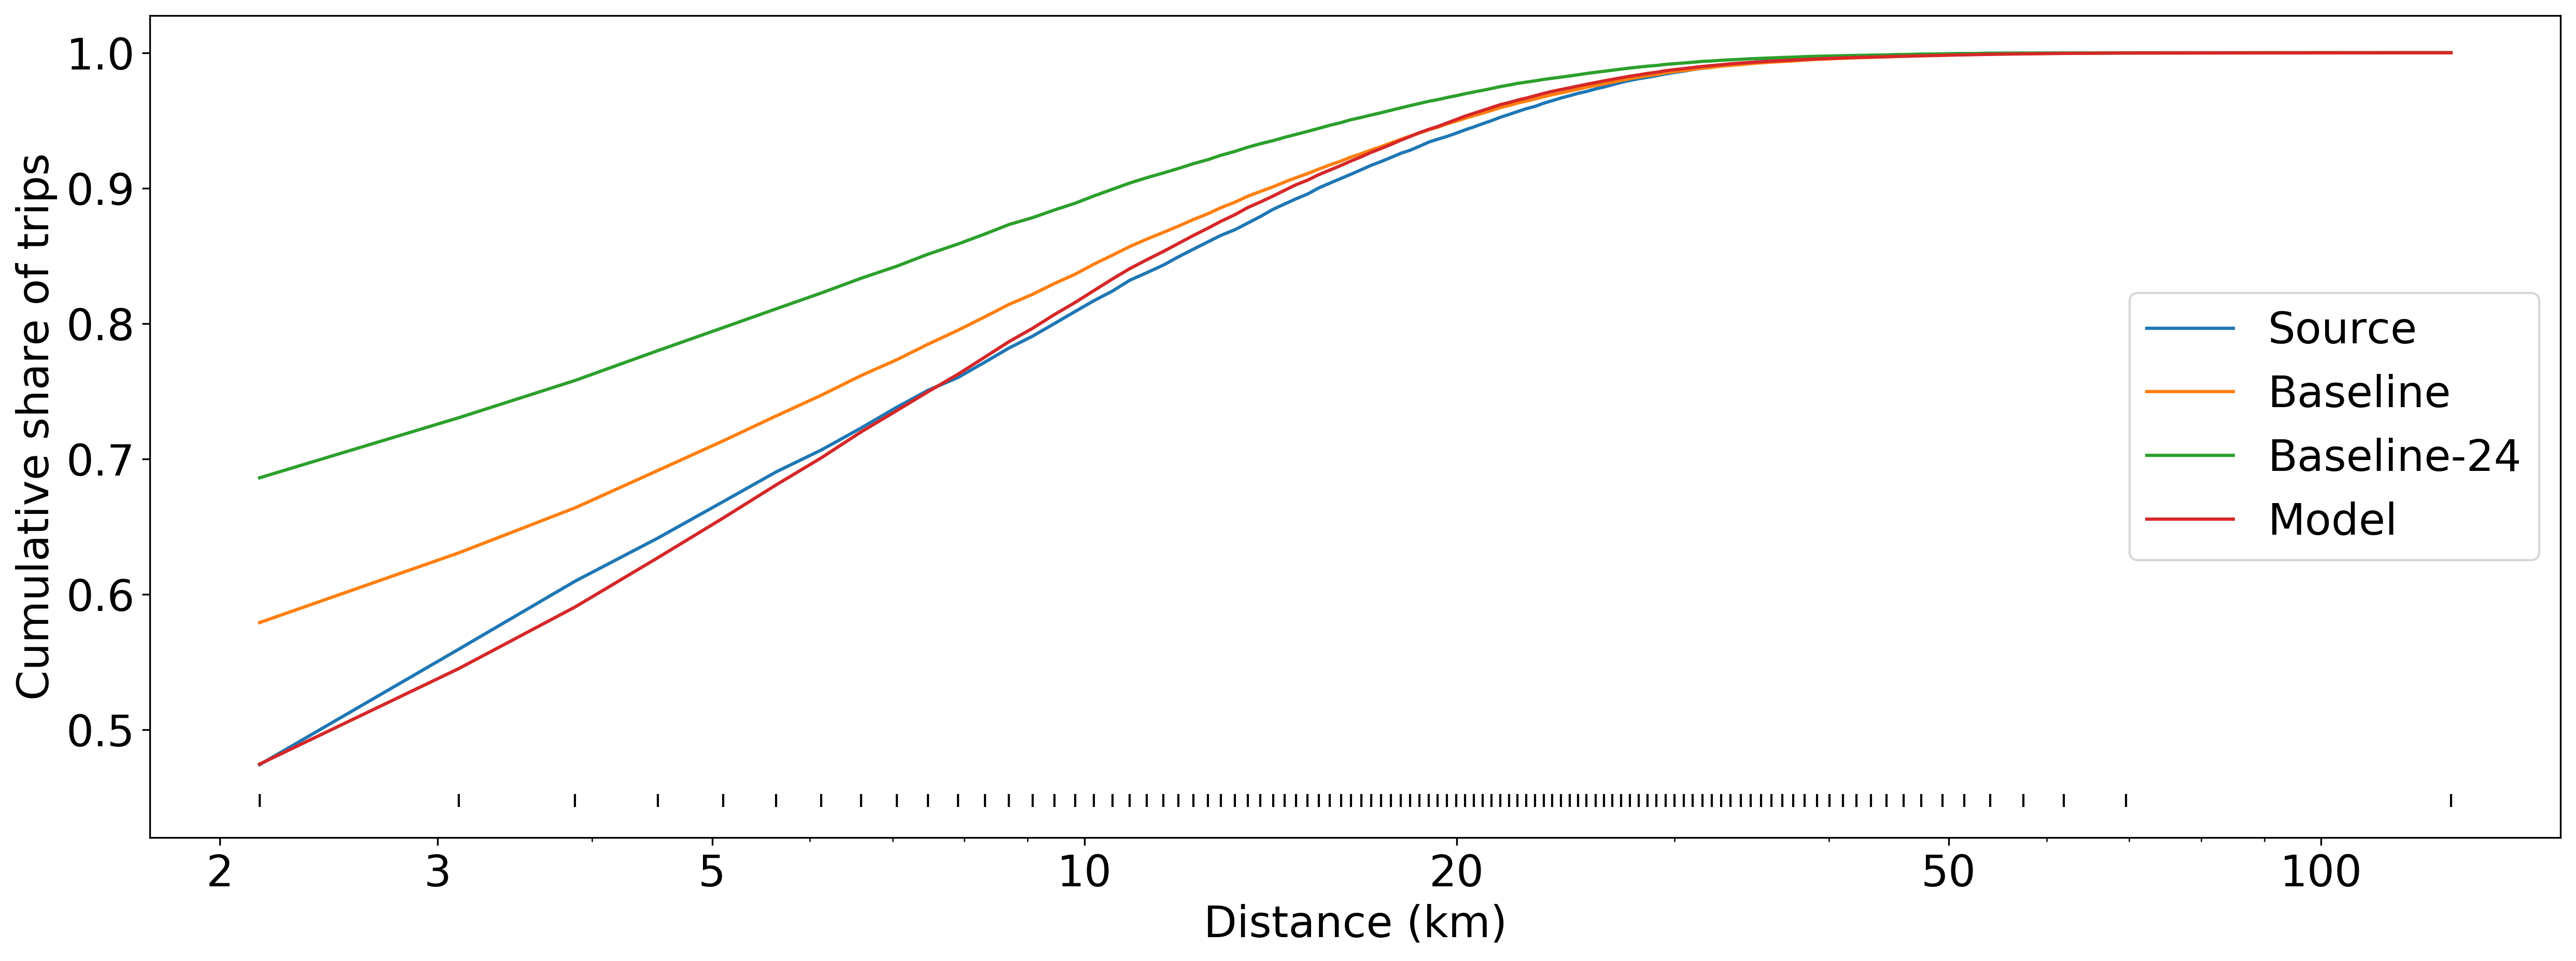

In [63]:
mpl.rcParams['font.size'] = 20.0
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
plots.generic_plot_dist_distribution(
    ax, 
    [
        dms['groundtruth_sum'],
        dms['model_sum_baseline'],
        dms['model_sum_baseline_24'],
        dms['model_sum'],
    ], ["Source", "Baseline", "Baseline-24", "Model"], ticks=[2, 3, 5, 10, 20, 50, 100], yscale='linear')

# Sweden

In [45]:
region = 'sweden'
scale= 'east'

In [46]:
p = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'model', scale)
p_base = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'baseline', scale)
p_base24 = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'sweden-baseline-24', scale)
dms = pd.read_csv(p).set_index(['distance'])
dms_base = pd.read_csv(p_base).set_index(['distance'])
dms_base_24 = pd.read_csv(p_base24).set_index(['distance'])

In [47]:
dms = dms.join(dms_base['model_sum'], rsuffix='_baseline')
dms = dms.join(dms_base_24['model_sum'], rsuffix='_baseline_24')
dms = dms[['sampers_sum', 'model_sum', 'model_sum_baseline', 'model_sum_baseline_24']]

In [48]:
dms.index = pd.IntervalIndex.from_tuples([tuple(list(map(float, idx.replace('(', '').replace(']', '').split(",")))) for idx in dms.index])

In [49]:
if scale == 'national':
    dms = dms[dms['model_sum'] != 0.0]

In [50]:
sqrerr = np.square(np.subtract(dms['sampers_sum'], dms['model_sum_baseline_24']))
"MSE: {:.5e}".format(sqrerr.mean())

'MSE: 7.13049e-05'

east


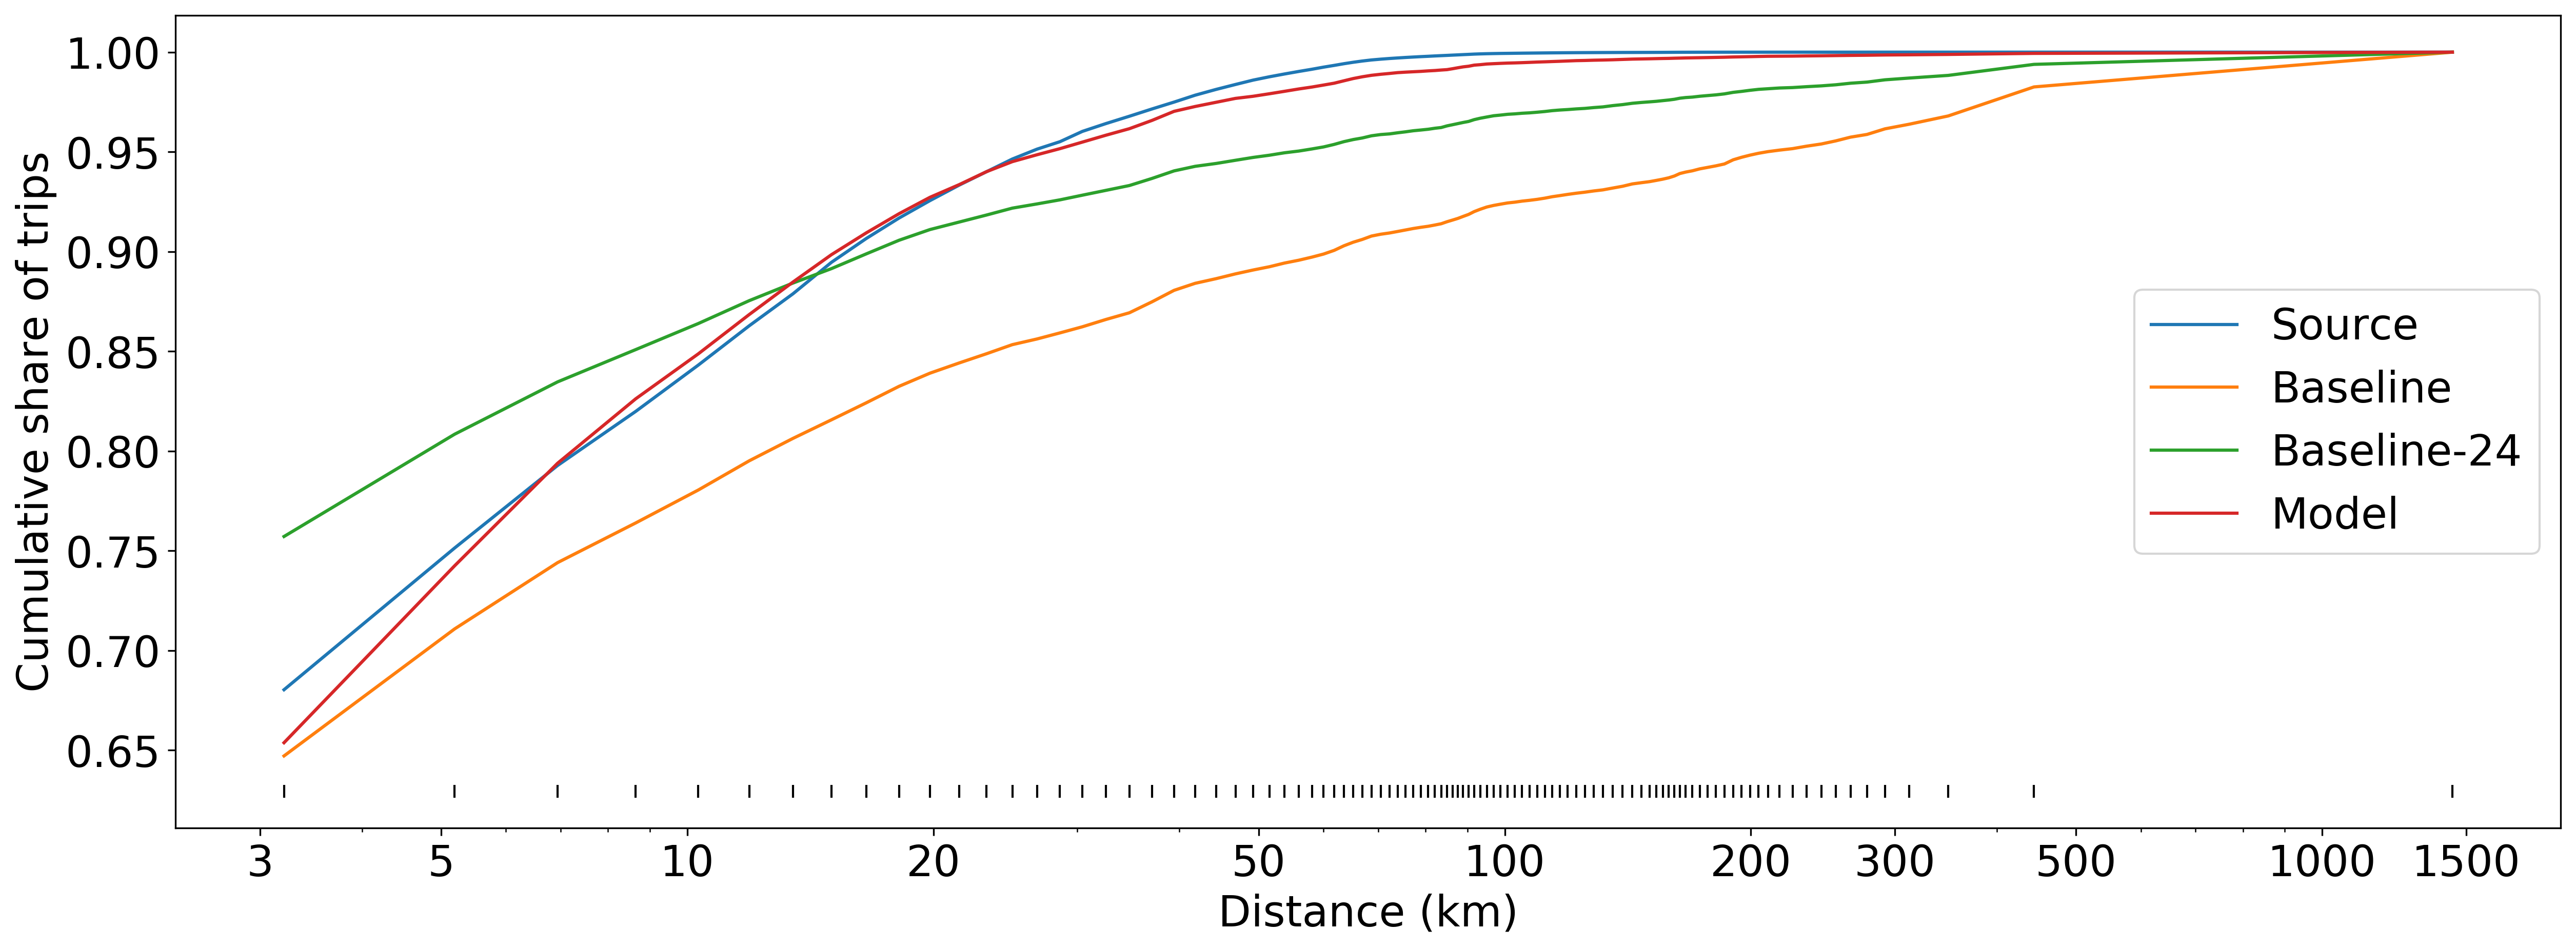

In [51]:
if scale == 'national':
    dms = dms[dms['model_sum'] != 0.0]
mpl.rcParams['font.size'] = 20.0
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
plots.generic_plot_dist_distribution(
    ax, 
    [
        dms['sampers_sum'],
        dms['model_sum_baseline'],
        dms['model_sum_baseline_24'],
        dms['model_sum'], #3, 5, 10, 20, 50, 
    ], ["Source", "Baseline", "Baseline-24", "Model"], yscale='linear', ticks=[3, 5, 10, 20, 50, 100, 200, 300, 500, 1000, 1500])
print(scale)